In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('br_me_sic_transferencia.csv')
df.head()

,ano,mes,id_esfera_orcamentaria,nome_esfera_orcamentaria,id_natureza_juridica,nome_natureza_juridica,id_resultado_primario,nome_resultado_primario,id_unidade_organizacional_nivel_0,nome_unidade_organizacional_nivel_0,id_unidade_organizacional_nivel_1,nome_unidade_organizacional_nivel_1,id_unidade_organizacional_nivel_2,nome_unidade_organizacional_nivel_2,id_unidade_organizacional_nivel_3,nome_unidade_organizacional_nivel_3,valor_custo_transferencia
0,2015,5,1,ORCAMENTO FISCAL,1,EMPRESA PUBLICA,3,PRIMARIO SEM IMPACTO FISCAL,26,PRESIDENCIA DA REPUBLICA,1988,"MINISTERIO DA CIENCIA, TECNOLOGIA E INOVACAO",1,FINANCIADORA DE ESTUDOS E PROJETOS,-9,NAO SE APLICA,2732062.96
1,2015,1,1,ORCAMENTO FISCAL,1,EMPRESA PUBLICA,6,DESPESA DISCRICIONARIA DECORRENTE DE EMENDA IN...,26,PRESIDENCIA DA REPUBLICA,1988,"MINISTERIO DA CIENCIA, TECNOLOGIA E INOVACAO",1,FINANCIADORA DE ESTUDOS E PROJETOS,-9,NAO SE APLICA,3474900.00
2,2015,8,1,ORCAMENTO FISCAL,1,EMPRESA PUBLICA,6,DESPESA DISCRICIONARIA DECORRENTE DE EMENDA IN...,26,PRESIDENCIA DA REPUBLICA,1988,"MINISTERIO DA CIENCIA, TECNOLOGIA E INOVACAO",1,FINANCIADORA DE ESTUDOS E PROJETOS,-9,NAO SE APLICA,19283163.10
3,2015,7,1,ORCAMENTO FISCAL,1,EMPRESA PUBLICA,3,PRIMARIO SEM IMPACTO FISCAL,26,PRESIDENCIA DA REPUBLICA,1988,"MINISTERIO DA CIENCIA, TECNOLOGIA E INOVACAO",1,FINANCIADORA DE ESTUDOS E PROJETOS,-9,NAO SE APLICA,5130042.70
4,2015,9,1,ORCAMENTO FISCAL,1,EMPRESA PUBLICA,6,DESPESA DISCRICIONARIA DECORRENTE DE EMENDA IN...,26,PRESIDENCIA DA REPUBLICA,1988,"MINISTERIO DA CIENCIA, TECNOLOGIA E INOVACAO",1,FINANCIADORA DE ESTUDOS E PROJETOS,-9,NAO SE APLICA,8543458.31


In [73]:
df["valor_custo_transferencia"].describe()

count    2.935400e+04
mean     1.010271e+07
std      1.232684e+08
min     -6.284670e+08
25%      0.000000e+00
50%      8.878000e+01
75%      5.015714e+05
max      8.956496e+09
Name: valor_custo_transferencia, dtype: float64

<Axes: ylabel='valor_custo_transferencia'>

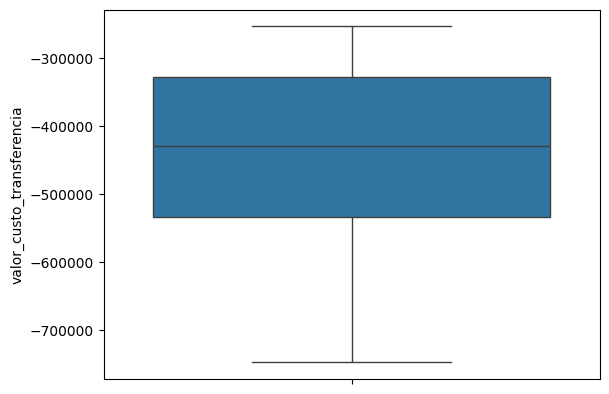

In [74]:
Q1 = df['valor_custo_transferencia'].quantile(0.25)
Q3 = df['valor_custo_transferencia'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR 
limite_superior = Q3 - 1.5 * IQR

df_filtrado = df[(df['valor_custo_transferencia'] >= limite_inferior) & (df['valor_custo_transferencia'] <= limite_superior)]

sns.boxplot(y=df_filtrado['valor_custo_transferencia']) 

In [75]:
df['valor_custo_transferencia'].value_counts()

valor_custo_transferencia
0.00          14317
1500.00         145
500000.00       129
300000.00       123
100000.00       110
              ...  
344176.80         1
312500.00         1
95756.40          1
35833.94          1
5130042.70        1
Name: count, Length: 12276, dtype: int64

In [76]:
df['valor_custo_transferencia'].max()

np.float64(8956496242.53)

In [77]:
df.groupby('nome_unidade_organizacional_nivel_1').agg({'valor_custo_transferencia':['mean']})

,valor_custo_transferencia
,mean
nome_unidade_organizacional_nivel_1,
ADVOCACIA-GERAL DA UNIAO,2.631454e+07
BANCO CENTRAL DO BRASIL,1.772628e+05
CASA CIVIL DA PRESIDENCIA DA REPUBLICA,9.211333e+05
CONTROLADORIA-GERAL DA UNIAO,2.943084e+05
GABINETE DE SEGURANCA INSTITUCIONAL DA PRESIDENCIA DA REPUBLICA,1.496777e+03
...,...
SECRETARIA DE COMUNICACAO SOCIAL DA PRESIDENCIA DA REPUBLICA,1.200000e+05
SECRETARIA DE GOVERNO DA PRESIDENCIA DA REPUBLICA,4.701691e+05


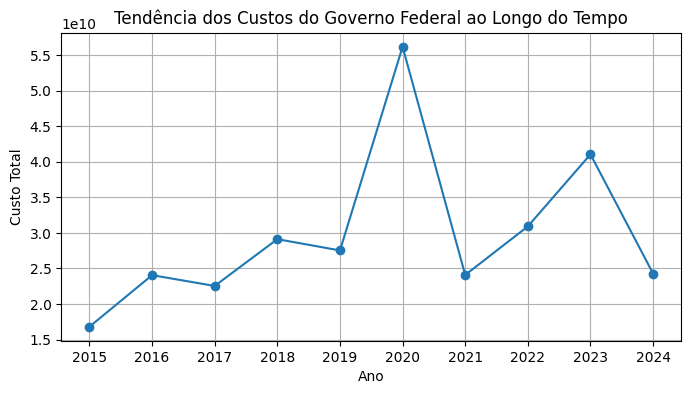

In [78]:

# Converte valores não numéricos para NaN e depois para inteiro, removendo linhas com valores não válidos
# Exemplo de criação de df_agrupado
df_agrupado = df.groupby('ano')['valor_custo_transferencia'].sum().reset_index()
df_agrupado = df_agrupado.dropna(subset=['ano'])  # Remove linhas com NaN na coluna 'ano'
df_agrupado['ano'] = df_agrupado['ano'].astype(int)  # Converte para inteiro

# Plotando o gráfico com o eixo x apenas com o ano
plt.figure(figsize=(8, 4))
plt.plot(df_agrupado['ano'], df_agrupado['valor_custo_transferencia'], marker='o')
plt.title('Tendência dos Custos do Governo Federal ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Custo Total')
plt.grid()
plt.xticks(df_agrupado['ano'])  # Define os anos como valores dos ticks no eixo x
plt.show()


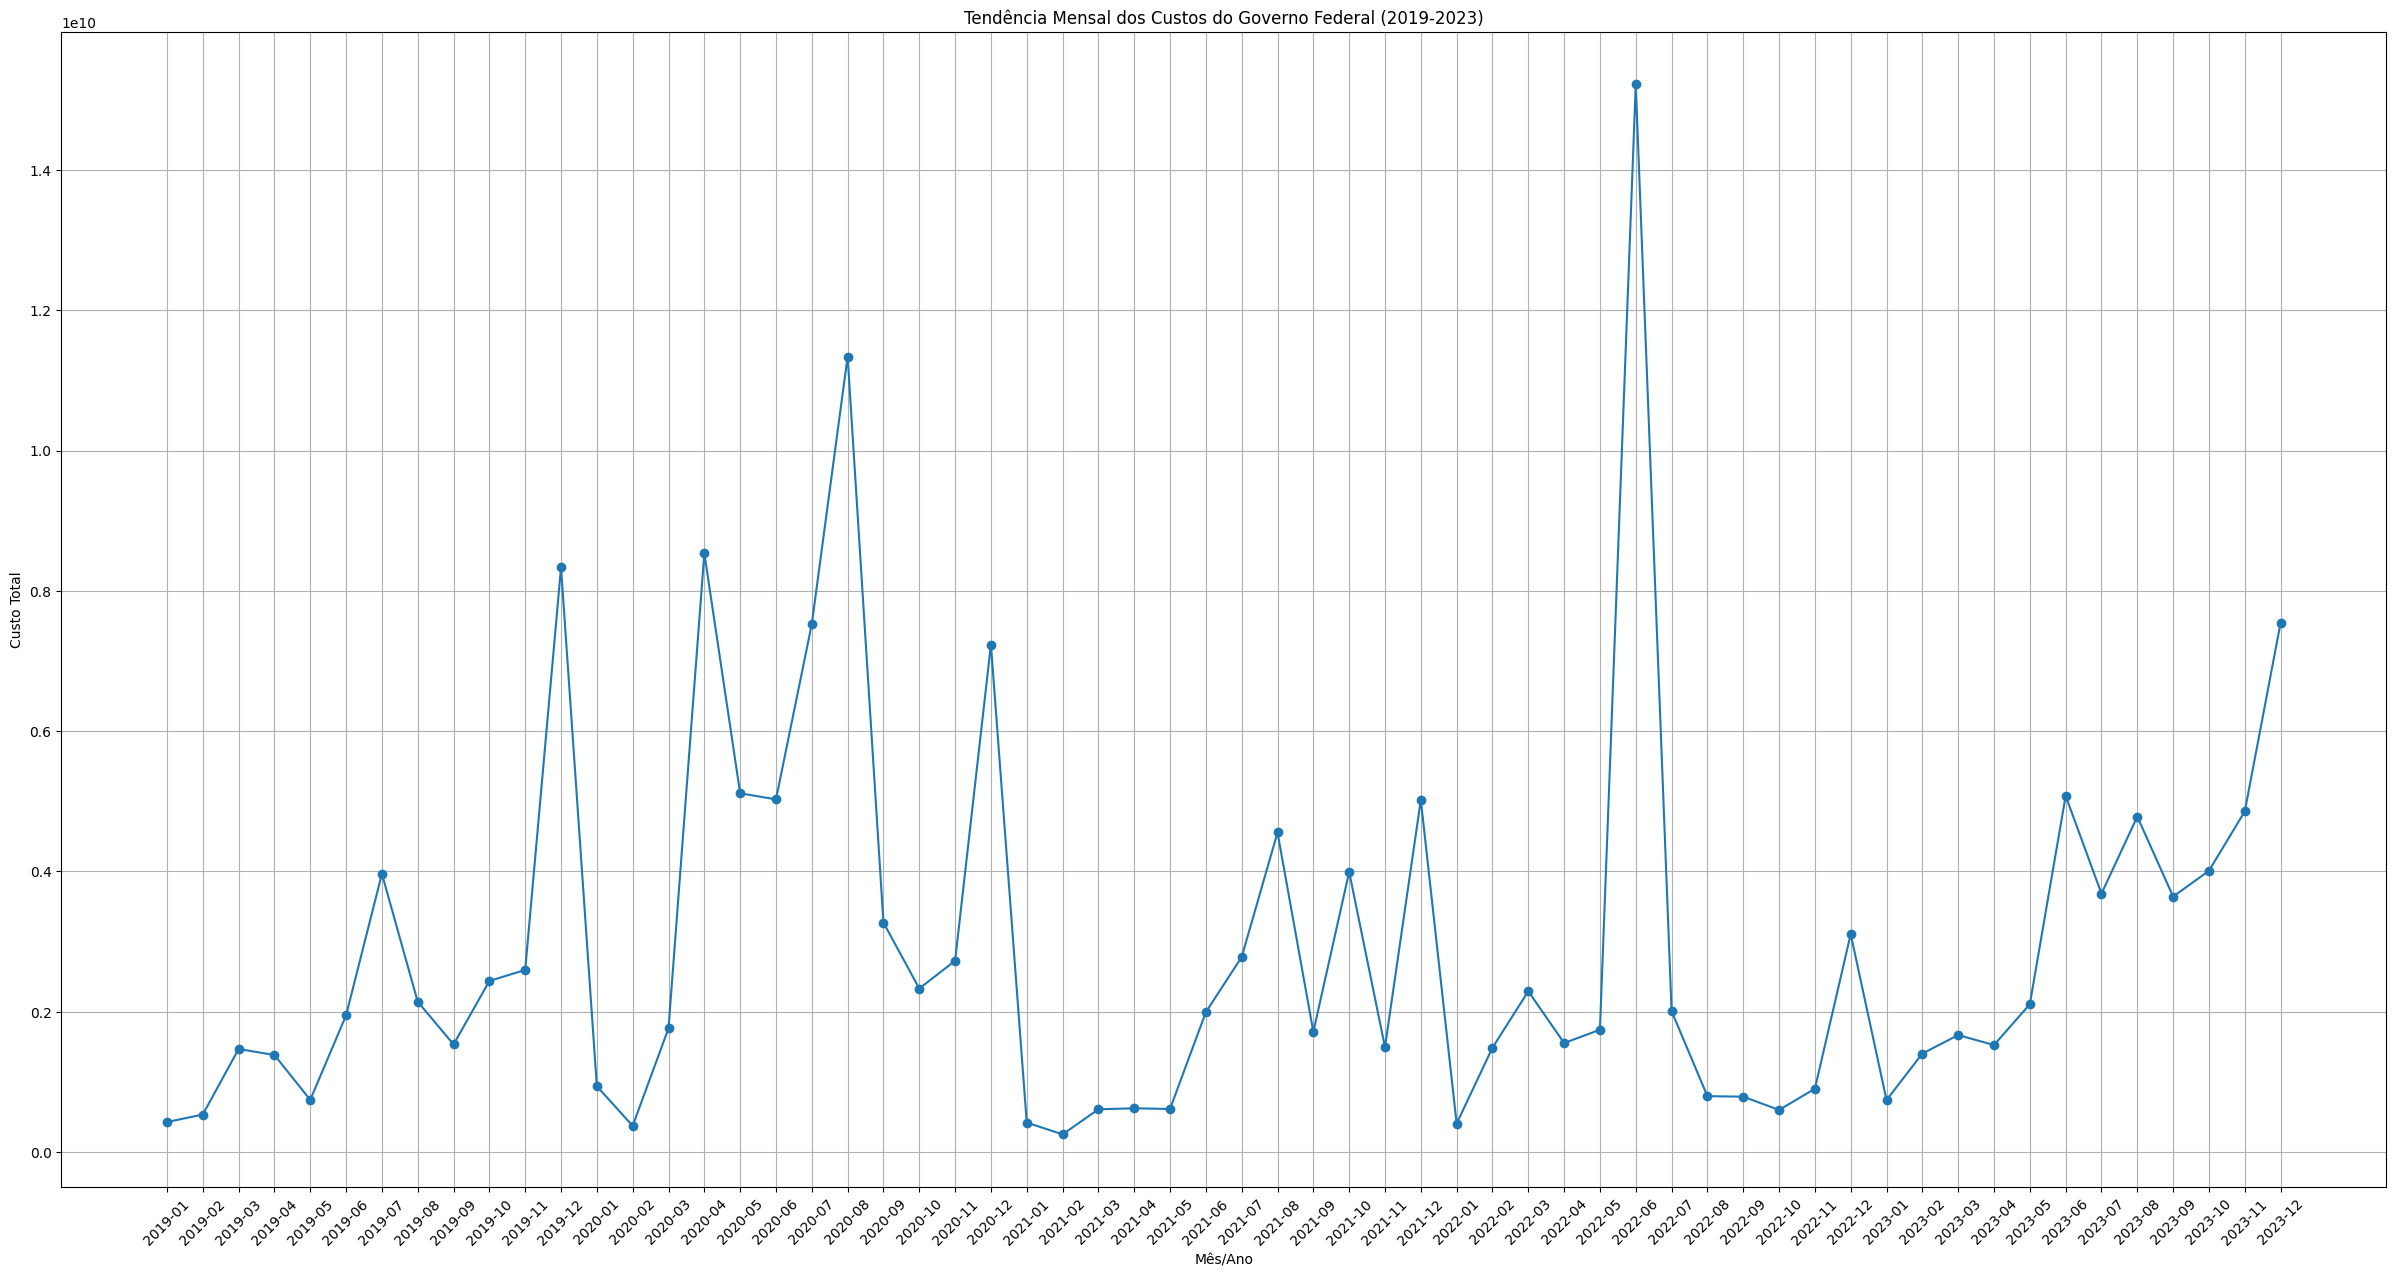

In [ ]:
df_periodo = df[(df['ano'] >= 2019) & ((df['ano'] < 2023) | ((df['ano'] == 2023) & (df['mes'] <= 12)))]

df_agrupado_mensal = df_periodo.groupby(['ano', 'mes'])['valor_custo_transferencia'].sum().reset_index()

df_agrupado_mensal['data'] = pd.to_datetime(df_agrupado_mensal['ano'].astype(str) + '-' + df_agrupado_mensal['mes'].astype(str) + '-01')

df_agrupado_mensal['ano_mes'] = df_agrupado_mensal['ano'].astype(str) + '-' + df_agrupado_mensal['mes'].astype(str).str.zfill(2)

plt.figure(figsize=(30, 15))
plt.plot(df_agrupado_mensal['ano_mes'], df_agrupado_mensal['valor_custo_transferencia'], marker='o')

plt.title('Tendência Mensal dos Custos do Governo Federal (2019-2023)')
plt.xlabel('Mês/Ano')
plt.ylabel('Custo Total')
plt.grid()

plt.xticks(rotation=45)
plt.show()


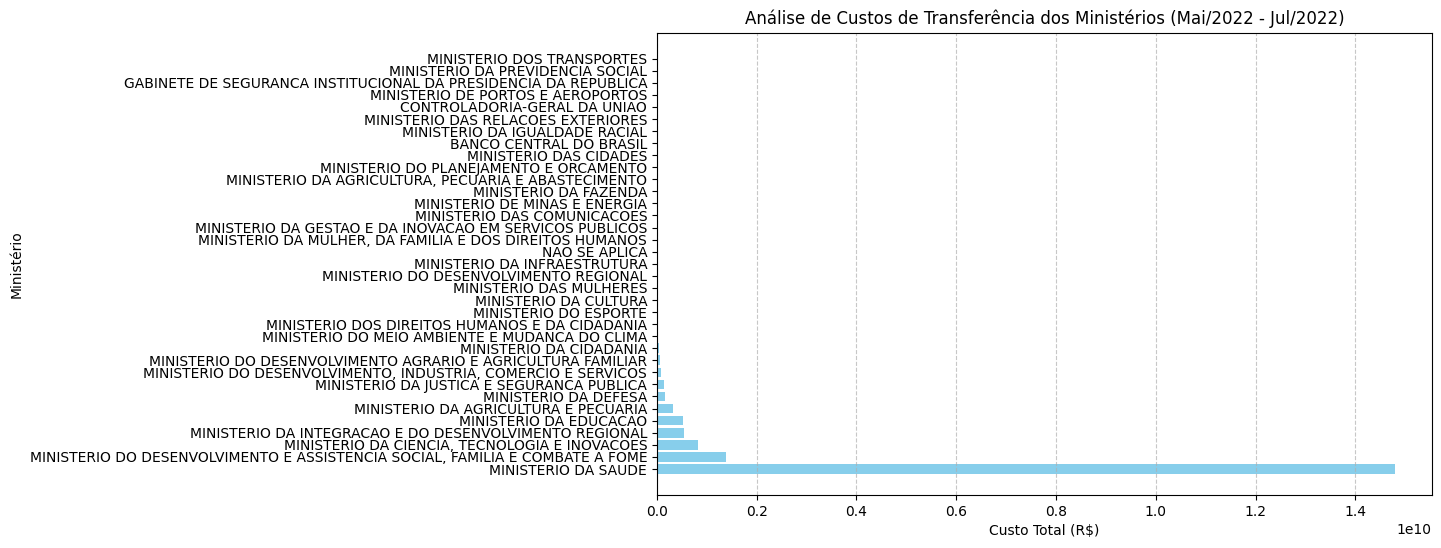

In [ ]:
df_periodo_ministerios = df[(df['ano'] == 2022) & (df['mes'].between(5, 7))]

df_agrupado_ministerios = df_periodo_ministerios.groupby('nome_unidade_organizacional_nivel_1')['valor_custo_transferencia'].sum().reset_index()

df_agrupado_ministerios = df_agrupado_ministerios.sort_values(by='valor_custo_transferencia', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df_agrupado_ministerios['nome_unidade_organizacional_nivel_1'], df_agrupado_ministerios['valor_custo_transferencia'], color='skyblue')
plt.title('Análise de Custos de Transferência dos Ministérios (Mai/2022 - Jul/2022)')
plt.xlabel('Custo Total (R$)')
plt.ylabel('Ministério')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

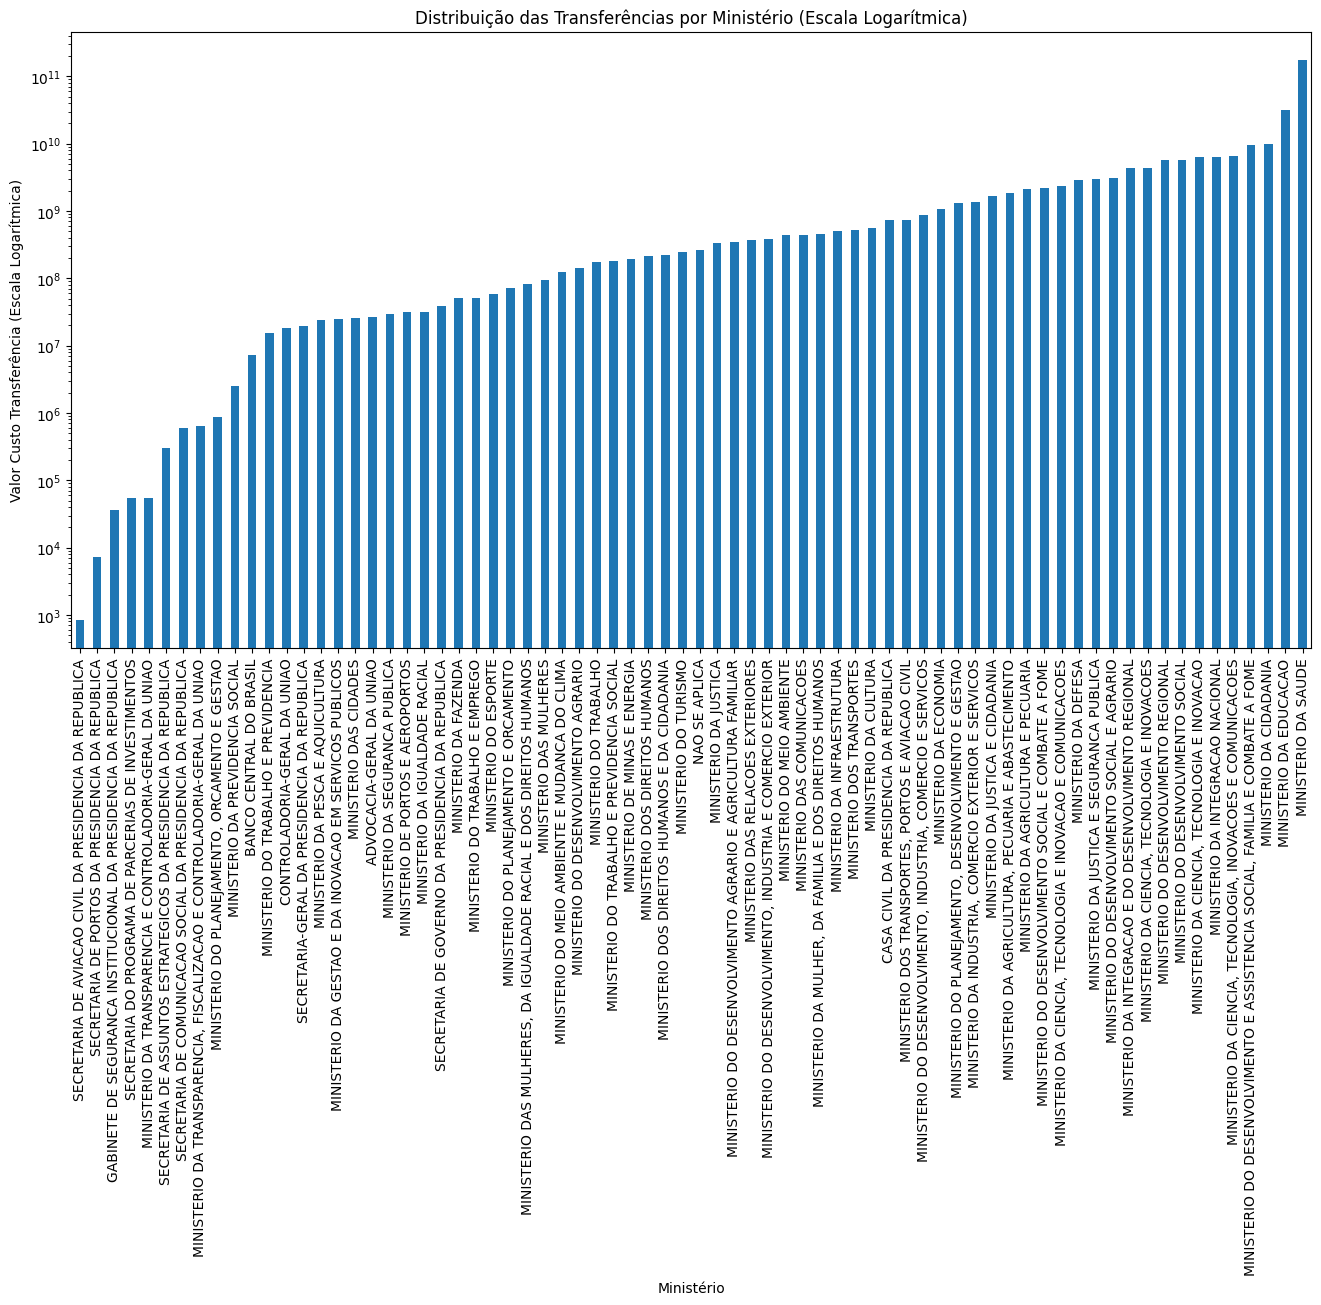

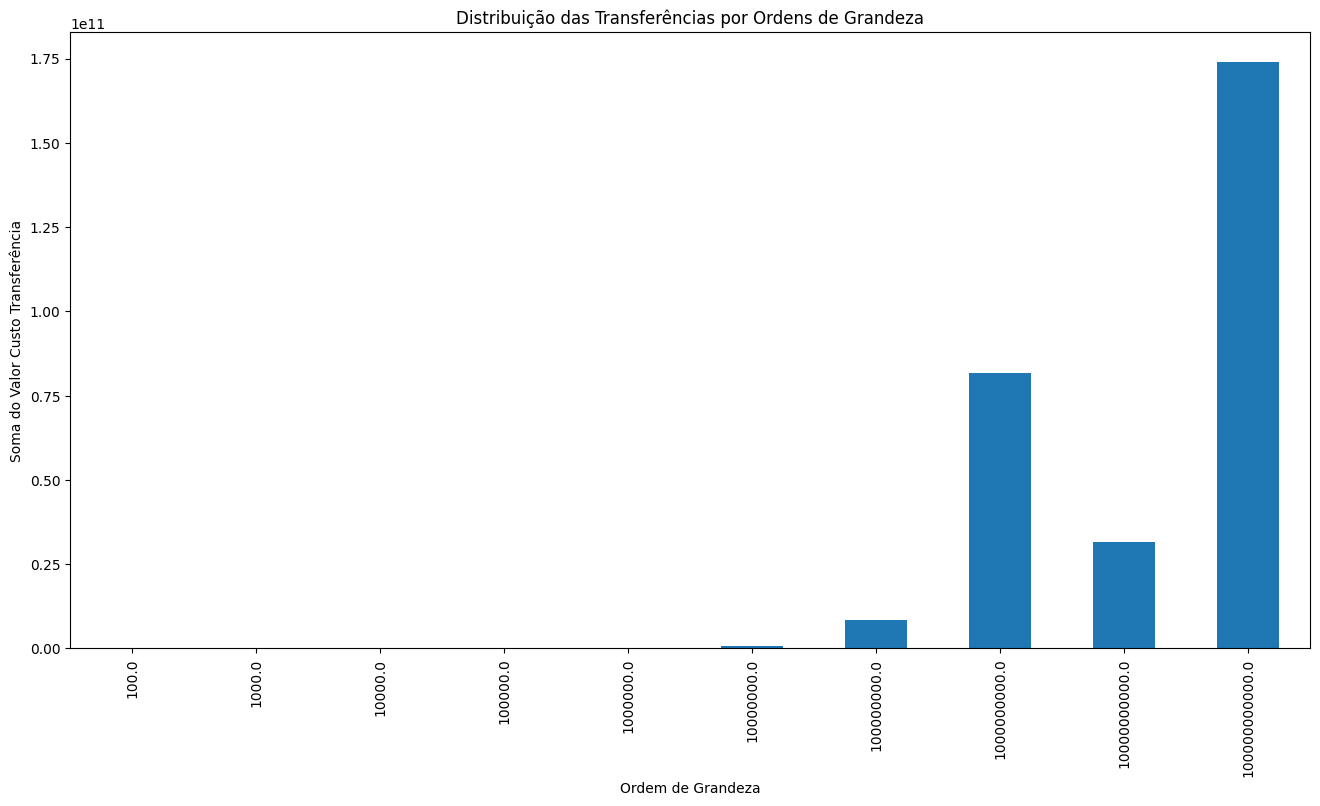

In [ ]:


custos_por_categoria = df.groupby('nome_unidade_organizacional_nivel_1')['valor_custo_transferencia'].sum()
custos_por_categoria = custos_por_categoria[custos_por_categoria < 1e13]  
custos_por_categoria = custos_por_categoria.sort_values(ascending=True)

plt.figure(figsize=(16, 8))
custos_por_categoria.plot(kind='bar', logy=True)
plt.title('Distribuição das Transferências por Ministério (Escala Logarítmica)')
plt.xlabel('Ministério')
plt.ylabel('Valor Custo Transferência (Escala Logarítmica)')
plt.show()

ordens_de_grandeza = 10 ** np.floor(np.log10(custos_por_categoria))
custos_agrupados = custos_por_categoria.groupby(ordens_de_grandeza).sum()

plt.figure(figsize=(16, 8))
custos_agrupados.plot(kind='bar')
plt.title('Distribuição das Transferências por Ordens de Grandeza')
plt.xlabel('Ordem de Grandeza')
plt.ylabel('Soma do Valor Custo Transferência')
plt.show()



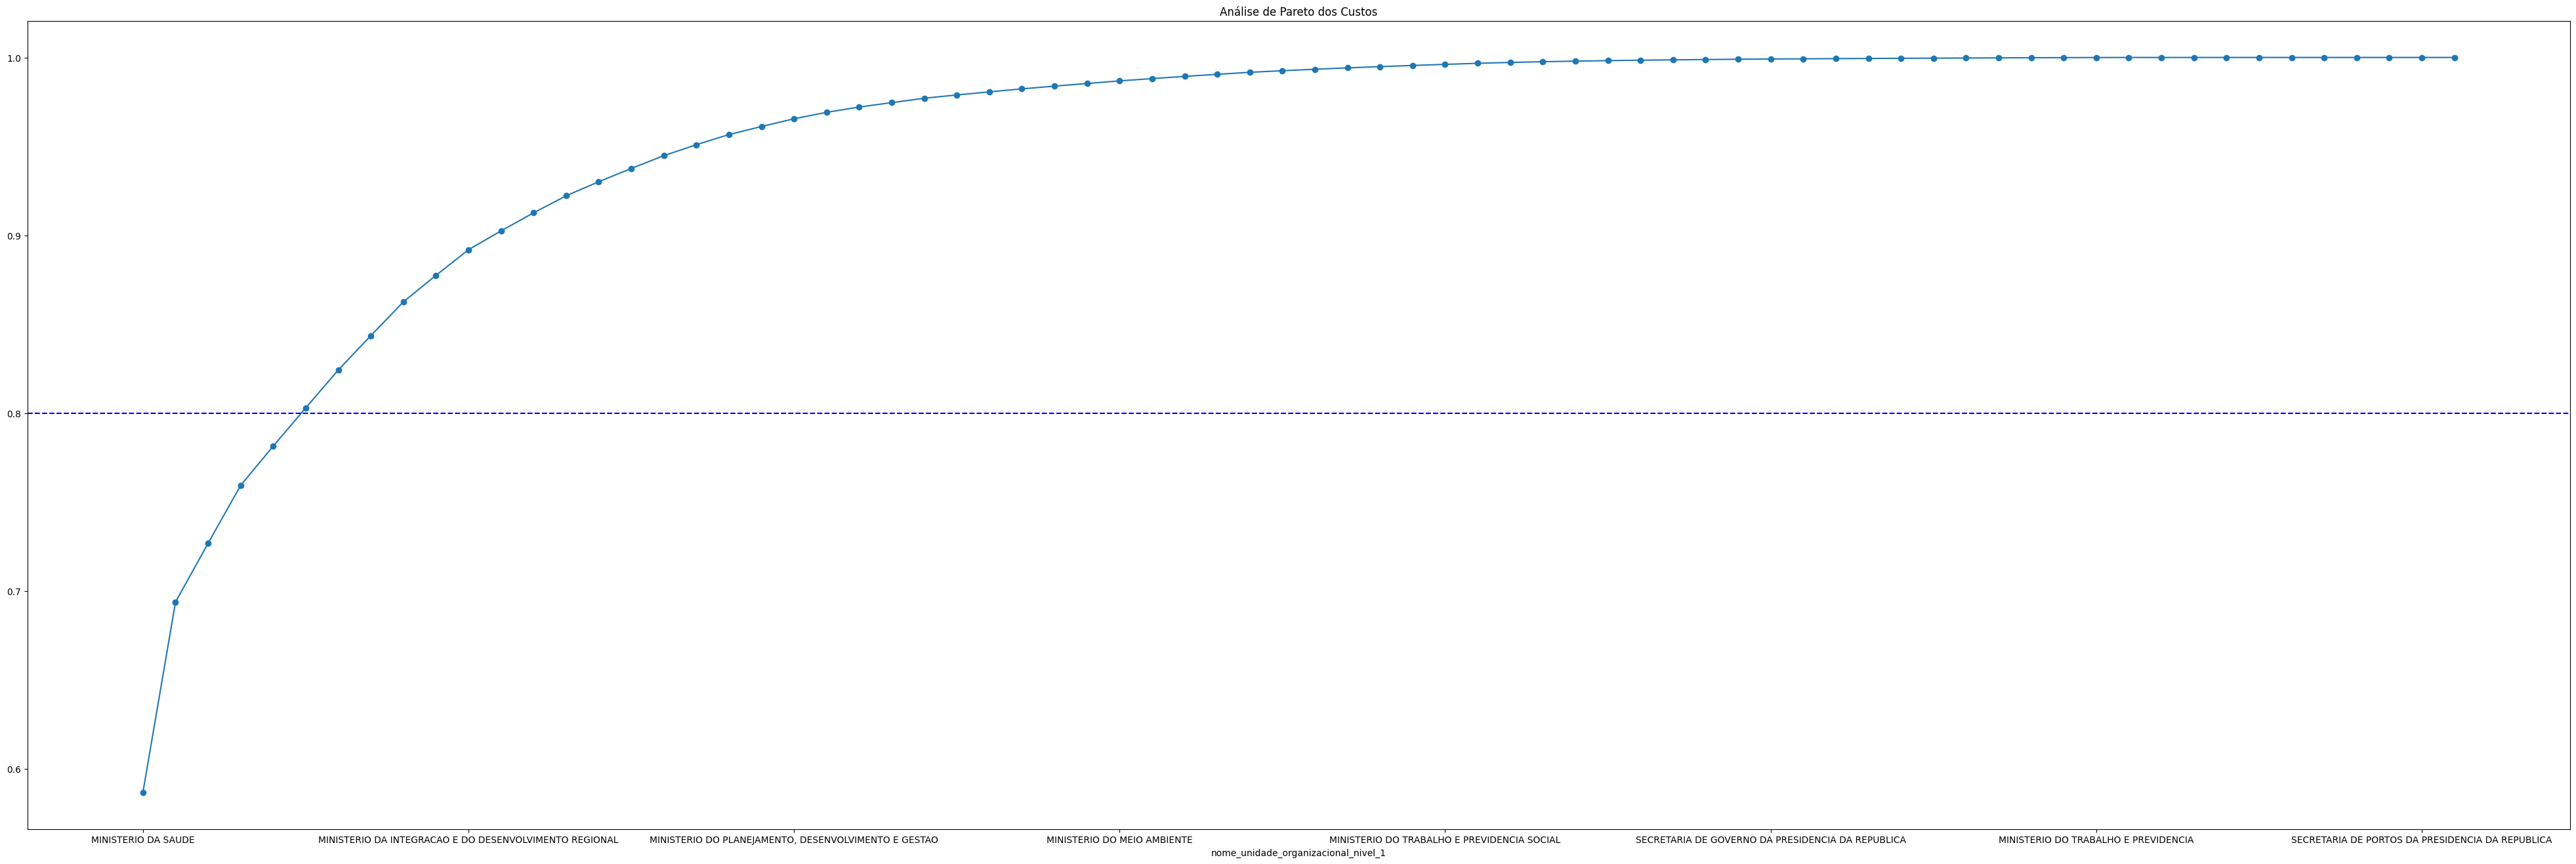

In [ ]:
custos_por_categoria = df.groupby('nome_unidade_organizacional_nivel_1')['valor_custo_transferencia'].sum().sort_values(ascending=False)
total = custos_por_categoria.sum()
custos_por_categoria.cumsum().div(total).plot(kind='line',marker='o',figsize=(50,16))
plt.axhline(0.8,color='blue', linestyle="--")
plt.title("Análise de Pareto dos Custos")
plt.show()


NameError: name 'custos_por_categoria' is not defined